# WeRateDogs

## Introduction

@dog_rates WeRateDogs
The ratings that they have archived from Twitter have been filtered from 5000 to 2356 tweets. These tweets have ratings. However, some details such as the ratings, dog names, dog stages are not correct. Dog stages are:  doggo, pupper, puppo, and floof(er).
Going to use the Twitter Archive to find the retweet and favourite count. 
Prediction tweets.
Want original images (no retweets). In the dataset, not all of them are original.
Assess and clean at least 8 quality issues and at least 2 tidiness issues.
Do not gather tweets beyond August 1st 2017, won't be able to gather image preidictions passed this date.


## To Do

- Get a Twitter Developer account
- Get the Twitter API keys
- Download the Twitter archive given by Udacity
- Download the Tweet images do this by using the Requests library 
- Identify at least 8 quality and 2 tidiness issues
- Assess and clean these issues
- Correct the ratings, dog names, dog stages
- Gather original images, not retweets
- Gather the retweet and favourite count
- Install the Tweepy library


## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import requests
import json
import os
from timeit import default_timer as timer

## Gathering Datasets:
Gathering Twitter archive given by Udacity, images from Tweets, and retweet/favourite count from Twitter's API. 

### 1. Twitter Archive Data

In [2]:
df_arc = pd.read_csv("twitter-archive-enhanced.csv")
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Images from Twitter

In [3]:
#create a folder
folder = "image_predictions"
if not os.path.exists(folder):
    os.makedirs(folder)

#Using the URL to get the images from Twitter 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#downloading the files to the specified folder
response = requests.get(url)
with open(os.path.join(folder + "/image-predictions.tsv"), "wb") as file: #wb means writing in binary mode
    file.write(response.content)

In [4]:
images = pd.read_csv("image_predictions//image-predictions.tsv", sep = "\t") #seperate the strings by tabular 
images.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Data from Twitter API (Retweet/Favourite Count)

In [5]:
consumer_key = 'UDFvUBJONqeZAN7CiirOHqlnf'
consumer_secret = 'X0HlRpj4ncfKULTRntf83uD4IFKUo1EGMz4X6zQdLhCP2sJjew'
access_token = '1033698097598214148-1PItGIRDQYBcDdeuberGDQYqLCUdhj'
access_secret = '8ycsLG30C40I1tXa5e7deBEEtCdfNrPwrDqmn1TOk4O9N'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
tweet_ids = df_arc.tweet_id.values
len(tweet_ids)

2356

In [7]:
#tweepy library, store each tweet in tweet_json.txt

tweets_list =[]
with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        tweets_dict['tweet_id'] = tweets_json['id']
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [8]:
#convert the text into a dataframe 

tweets_stats = pd.DataFrame(tweets_list)
tweets_stats.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## Assessing Datasets:
All three datasets are assessed visually and programmatically, this is to avoid unnecessary cleaning steps afterwarsds. 

### 1. Twitter Archive Data

In [9]:
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_arc.shape

#there are too many columns in this dataset

(2356, 17)

In [13]:
df_arc["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df_arc["name"].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Bailey         7
an             7
Toby           7
Daisy          7
Bella          6
Leo            6
Oscar          6
Rusty          6
Koda           6
Scout          6
Dave           6
Jack           6
Milo           6
Jax            6
Stanley        6
Phil           5
            ... 
Lance          1
Venti          1
Kanu           1
Gin            1
Hermione       1
Lilli          1
Mabel          1
Jeffrie        1
Cermet         1
Rambo          1
Tuck           1
Lacy           1
Joey           1
Julio          1
Billy          1
Dido           1
Nigel          1
Julius         1
Remus          1
Dot            1
Enchilada      1
Tycho          1
Gerbald        1
Willy          1
Godzilla       1
Franq          1
Timber         1
Bauer         

In [15]:
df_arc.duplicated().sum()

0

In [16]:
df_arc["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [17]:
#Some url's do not work because the column has been truncated in the dataframe
pd.set_option('display.max_colwidth', -1)
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 2. Images from Twitter

In [18]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
images.duplicated().sum()

0

### 3. Data from Twitter API 

In [22]:
tweets_stats.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [23]:
tweets_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
tweets_stats.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [25]:
tweets_stats.duplicated().sum()

0

## Cleaning Datasets:
To clean datasets, it is important to make a copy so the original dataset is not altered. 

### Quality 
Dimensions of data quality are: Completeness, Validity, Accuracy, and Consistency. 

##### Twitter Archive Data 

1. Many columns have missing values. This tells us which tweet is original. These columns can be dropped after original tweets are collected. 
2. In the description, the denominator should be 10 for every entry, this is not the case. 
3. Some names are not names, for example "a" and "an". 
4. Duplicates have to be deleted once the melt function is used.
5. Remove the retweets as only original tweets are wanted. 
6. The source has a lots of text, only want the information that says "Twitter for iPhone"

##### Images from Twitter

1. The predicted dogs have lowercases in their names.
2. Remove the "_" and replace it with a space for the px columns.


##### Data from Twitter API 

### Tidiness

##### Twitter Archive Data 

1. Doggo, floofer, pupper, puppo should not have separate columns as they are variables. 
2. The text column has the text, rating of the dog, and a url. These should all be in separate columns.


##### Images from Twitter

1. The px, px_conf, and px_dog columns should be dropped and only 1 dog breed and confidence is predicted.


##### Data from Twitter API 

1. All three dataframes should be merged into one, with tweet_id being the common column. 

### 1. Twitter Archive Data

In [26]:
#make a copy of the dataframe
arc_clean = df_arc.copy()

In [27]:
arc_clean.shape

(2356, 17)

#### Define
Remove the retweets. This is indicated by "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" columns not being null, therefore, keep these rows which are null.

#### Code

In [28]:
arc_clean = arc_clean[arc_clean.retweeted_status_id.isnull()]
arc_clean = arc_clean[arc_clean.retweeted_status_user_id.isnull()]
arc_clean = arc_clean[arc_clean.retweeted_status_timestamp.isnull()]

#### Test

In [29]:
arc_clean.shape

#the rows have decreased, this means that the retweets have been removed. 

(2175, 17)

#### Define
Drop timestamp, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

#### Code

In [30]:
arc_clean.drop(columns = ["timestamp","in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","expanded_urls"], axis = 1, inplace = True)

#### Test

In [31]:
arc_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


#### Define
From the text column, seperate the the text, ratings, and url. Put these into different columns.

#### Code

In [32]:
arc_clean["texts"], arc_clean["url"] = arc_clean["text"].str.rsplit(" ", 1).str
arc_clean.drop(columns = ["text"], axis = 1, inplace = True)

#### Test

In [33]:
arc_clean

,tweet_id,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,texts,url
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://t.co/MgUWQ76dJU
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Tilly,None,None,None,None,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://t.co/tD36da7qLQ
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Franklin,None,None,None,None,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,None,None,None,None,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://t.co/kQ04fDDRmh
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Jax,None,None,None,None,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H,https://t.co/tVJBRMnhxl
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,None,None,None,None,None,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,https://t.co/v0nONBcwxq
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Zoey,None,None,None,None,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,https://t.co/9TwLuAGH0b
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",14,10,Cassie,doggo,None,None,None,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://t.co/t1bfwz5S2A


#### Define
Remove all the unecessary characters from the source by putting them in separate columns and dropping the "link" and "source" column.

#### Code

In [34]:
#source? Are they all from iphones? One is from web client one is from vine.
arc_clean.sample(5)
arc_clean["link"], arc_clean["sourced"] = arc_clean["source"].str.split(">", 1).str
arc_clean["sourced"] = arc_clean["sourced"].str.replace("</a>", " ")
arc_clean.drop(columns = ["link","source"], axis = 1, inplace = True)


#### Test

In [35]:
arc_clean

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,texts,url,sourced
0,892420643555336193,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://t.co/MgUWQ76dJU,Twitter for iPhone
1,892177421306343426,13,10,Tilly,None,None,None,None,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV,Twitter for iPhone
2,891815181378084864,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB,Twitter for iPhone
3,891689557279858688,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://t.co/tD36da7qLQ,Twitter for iPhone
4,891327558926688256,12,10,Franklin,None,None,None,None,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f,Twitter for iPhone
5,891087950875897856,13,10,None,None,None,None,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://t.co/kQ04fDDRmh,Twitter for iPhone
6,890971913173991426,13,10,Jax,None,None,None,None,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H,https://t.co/tVJBRMnhxl,Twitter for iPhone
7,890729181411237888,13,10,None,None,None,None,None,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,https://t.co/v0nONBcwxq,Twitter for iPhone
8,890609185150312448,13,10,Zoey,None,None,None,None,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,https://t.co/9TwLuAGH0b,Twitter for iPhone
9,890240255349198849,14,10,Cassie,doggo,None,None,None,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://t.co/t1bfwz5S2A,Twitter for iPhone


#### Define
In the "name" column, there are words which are not names, these are in lowercase. 
Gather all the words and replace them with "None"

#### Code

In [36]:
arc_clean["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [37]:
#the names are in capital letters, gather the unique lowercase words
no_name = set()

for word in arc_clean["name"]:
    if word.islower():
        no_name.add(word)
print(no_name)

{'quite', 'getting', 'infuriating', 'space', 'just', 'unacceptable', 'mad', 'this', 'his', 'actually', 'by', 'light', 'such', 'my', 'not', 'very', 'the', 'life', 'old', 'one', 'a', 'an', 'all', 'incredibly', 'officially'}


In [38]:
#replace the words that are not names with "None"
arc_clean = arc_clean.replace({'name': ['incredibly', 'his', 'life', 
                   'unacceptable', 'not', 'such', 'by', 
                   'quite', 'light', 'my', 'old', 'space', 
                   'infuriating', 'the', 'a', 'all', 'actually', 
                   'officially', 'getting', 'just', 'mad', 'one', 
                   'very', 'this', 'an']}, "None")

#### Test

In [39]:
#test if "his" is in the name column
arc_clean[arc_clean["name"]=="his"].count()

tweet_id              0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
texts                 0
url                   0
sourced               0
dtype: int64

#### Define
All denominators need to equal to 10.

In [40]:
#### Code

In [41]:
arc_clean["rating_denominator"] = 10

#### Test 

In [42]:
arc_clean["rating_denominator"].sum() #23560
arc_clean.info()

#rating_denominator has 2356 entries, and the sum of rating_denominator = 23560. Therefore, each rating_denominator = 10

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
texts                 2175 non-null object
url                   2174 non-null object
sourced               2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


#### Define
doggo, floofer, pupper, puppo has to be in one column called dog stages. 
With the melt function, it will give you a "dogs" column, which will duplicate each entry by 4 with each copy having dogoo, floofer, pupper, puppo. These duplicates are not needed, therefore, if the corresponding dog_stage column has "None" in it, those duplicates will be removed. However, some dog_stages truly have no entry, therefore, it is important not to remove all of those rows. 

#### Code

In [43]:
arc_clean = arc_clean.melt(id_vars = ["name", "texts","tweet_id","rating_numerator", "rating_denominator", "url", "sourced"], 
                               var_name = "dogs", value_name = "dog_stage")

In [44]:
#this shows that the melt function makes 4 of each, where dog_stage will be doggo, floofer, pupper,  puppo.
#the value is the one you want 
arc_clean.query('name == "Roscoe"')

#drop the dogs column
arc_clean = arc_clean.drop(["dogs"], axis =1)

In [45]:
#The melt function has given us duplicates
arc_clean = arc_clean.drop_duplicates()
arc_clean.texts.duplicated().shape
#No because it'll remove some dogs that have not got a defined stage

(2531,)

In [46]:
#keep last in all duplicates in text apart from the doggo stages
#to do this, the doggo in their dog stage are placed into a new df

doggos = arc_clean.query('dog_stage == "doggo"')
doggos.shape

(87, 8)

In [47]:
#keep last in duplicated texts

arc_clean = arc_clean.drop_duplicates(subset=['texts'], keep='last')
arc_clean.shape

(2175, 8)

In [48]:
#merge the doggos with the rest of the dogs (arc_clean)

arc_clean = pd.concat([arc_clean, doggos])


#### Test

In [49]:
arc_clean.shape

(2262, 8)

arc_clean.loc[150]

In [50]:
arc_clean.query('dog_stage == "floofer"')

,name,texts,tweet_id,rating_numerator,rating_denominator,url,sourced,dog_stage
2218,Grizzwald,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck,883360690899218434,13,10,https://t.co/rf661IFEYP,Twitter for iPhone,floofer
2654,Doc,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer,800388270626521089,12,10,https://t.co/azMneS6Ly5,Twitter for iPhone,floofer
2799,None,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath,776218204058357768,13,10,https://t.co/nzqTNw0744,Twitter for iPhone,floofer
2984,Blu,This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with,749317047558017024,12,10,https://t.co/HHUAnBb6QB,Twitter for iPhone,floofer
3021,None,Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen),746542875601690625,11,10,https://t.co/6ZRoZUWFmd,Vine - Make a Scene,floofer
3088,None,Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af,737445876994609152,13,10,https://t.co/CaG9MzD3WT,Twitter for iPhone,floofer
3107,Moose,This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently,733822306246479872,10,10,https://t.co/mVfqRdppTL,Twitter for iPhone,floofer
3530,None,Here we are witnessing a rare High Stepping Alaskan Floofer. 12/10 dangerously petable (vid by @TheMrsNux),689993469801164801,12,10,https://t.co/K4s9IJh2jm,Vine - Make a Scene,floofer
3610,Petrick,Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10,685307451701334016,11,10,https://t.co/rwW7z1JAOF,Twitter for iPhone,floofer


### 2. Images from Twitter

In [51]:
#p1,2, and 3 are the three top dogs the algorithm has predicted that the breed of the dog will be the image in the Tweet.
#p1_conf, p2_conf, and p3_conf are how confident the algorithm is in predicting the iamge is correct
#p1_dog, p2_dog, and p3_dog idicates whether or not the breed of the dog was predicted correctly. 

#check that the images are actually dogs. box_turtle, three-toed_sloth and hen are not
#check that the names are changed to the actual dog breeds. shopping_cart is actually a golden retriever, desktop_computer has a dog too. 
#the urls without the jpg at the end are not working. - how can I get the correct URL?

#### Define
Make a copy of the dataset, so that the original is kept intact. 

#### Code

In [52]:
#make a new copy of the dataframe so the original dataframe is intact. 
images_clean = images.copy()


#### Test

In [53]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
Remove the px, px_conf, px_dog and input only the one predicted dog breed and confidence interval. 
Add "breed" and "confidence" columns and delete the rest of the predicted columns. 
Delete the rows that are not dogs. 

#### Code

In [54]:
#make sure that the predictions are acutally dogs
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not a dog')
        confidence.append(0)
        
images_clean.apply(breed_confidence, axis = 1)
images_clean['breed'] = breed
images_clean['confidence'] = confidence

In [55]:
#drop columns that are not needed
images_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'], axis = 1, inplace = True)

In [56]:
#delete the rows that are not dogs
images_clean.drop(images_clean[images_clean['breed'] == "Not a dog"].index, inplace = True)

#### Test

In [57]:
images_clean.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [58]:
images_clean.query('breed == "Not a dog"').count()

tweet_id      0
jpg_url       0
breed         0
confidence    0
dtype: int64

#### Define
Delete "_" in between the words and capitalize each word to keep it consistent 

#### Code

In [59]:
images_clean["breed"] = images_clean.breed.str.replace("_"," ").str.title()

#### Test

In [60]:
images_clean.breed.value_counts()

Golden Retriever                  173
Labrador Retriever                113
Pembroke                          96 
Chihuahua                         95 
Pug                               65 
Toy Poodle                        52 
Chow                              51 
Samoyed                           46 
Pomeranian                        42 
Cocker Spaniel                    34 
Malamute                          34 
French Bulldog                    32 
Chesapeake Bay Retriever          31 
Miniature Pinscher                26 
Cardigan                          23 
Staffordshire Bullterrier         22 
Eskimo Dog                        22 
German Shepherd                   21 
Beagle                            21 
Siberian Husky                    20 
Shih-Tzu                          20 
Rottweiler                        19 
Lakeland Terrier                  19 
Shetland Sheepdog                 19 
Maltese Dog                       19 
Kuvasz                            19 
Italian Grey

#### Define
Rename column, so that we can compare both jpg urls from the Twitter archive and the image prediction.

#### Code

In [61]:
images_clean = images_clean.rename(columns={'jpg_url': 'predicted_jpg_url'})

In [62]:
images_clean

,tweet_id,predicted_jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden Retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden Retriever,0.775930


### 3. Data from Twitter API (Retweet/Favourite Count)

#### Define
Merge all clean frames. 

In [63]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 0 to 1026
Data columns (total 8 columns):
name                  2262 non-null object
texts                 2262 non-null object
tweet_id              2262 non-null int64
rating_numerator      2262 non-null int64
rating_denominator    2262 non-null int64
url                   2261 non-null object
sourced               2262 non-null object
dog_stage             2262 non-null object
dtypes: int64(3), object(5)
memory usage: 159.0+ KB


In [64]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id             1751 non-null int64
predicted_jpg_url    1751 non-null object
breed                1751 non-null object
confidence           1751 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


In [65]:
tweets_stats_clean = tweets_stats.copy()
tweets_stats_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Code

In [66]:
#merge arc_clean, images_clean and tweets_stats_clean
#column names that are the same: tweet_id
master_df_1 = pd.merge(arc_clean, images_clean, on='tweet_id', how='left')
master_df = pd.merge(master_df_1, tweets_stats_clean, on="tweet_id", how = "left")


In [67]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 0 to 2261
Data columns (total 13 columns):
name                  2262 non-null object
texts                 2262 non-null object
tweet_id              2262 non-null int64
rating_numerator      2262 non-null int64
rating_denominator    2262 non-null int64
url                   2261 non-null object
sourced               2262 non-null object
dog_stage             2262 non-null object
predicted_jpg_url     1750 non-null object
breed                 1750 non-null object
confidence            1750 non-null float64
favorite_count        2262 non-null int64
retweet_count         2262 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 247.4+ KB


In [68]:
master_df.head()

,name,texts,tweet_id,rating_numerator,rating_denominator,url,sourced,dog_stage,predicted_jpg_url,breed,confidence,favorite_count,retweet_count
0,Phineas,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,892420643555336193,13,10,https://t.co/MgUWQ76dJU,Twitter for iPhone,None,NaN,NaN,NaN,39467,8853
1,Tilly,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",892177421306343426,13,10,https://t.co/0Xxu71qeIV,Twitter for iPhone,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
2,Archie,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,891815181378084864,12,10,https://t.co/wUnZnhtVJB,Twitter for iPhone,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25461,4328
3,Darla,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,891689557279858688,13,10,https://t.co/tD36da7qLQ,Twitter for iPhone,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086,42908,8964
4,Franklin,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",891327558926688256,12,10,https://t.co/AtUZn91f7f,Twitter for iPhone,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,41048,9774


### Analysizing the Data

In [69]:
#what is maximum numerator rating given to the dog?
master_df["rating_numerator"].max()

1776

In [70]:
#what dog recieved the highest rating?
master_df.query('rating_numerator == "1776"')

,name,texts,tweet_id,rating_numerator,rating_denominator,url,sourced,dog_stage,predicted_jpg_url,breed,confidence,favorite_count,retweet_count
661,Atticus,This is Atticus. He's quite simply America af. 1776/10,749981277374128128,1776,10,https://t.co/GRXwMxLBkh,TweetDeck,None,NaN,NaN,NaN,5569,2772


In [71]:
#what is minimum numerator rating given to the dog?
master_df["rating_numerator"].min()

0

In [72]:
#what dog recieved the lowest rating?
master_df.query('rating_numerator == "0"')

,name,texts,tweet_id,rating_numerator,rating_denominator,url,sourced,dog_stage,predicted_jpg_url,breed,confidence,favorite_count,retweet_count
232,None,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10,835152434251116546,0,10,https://t.co/YbEJPkg4Ag,Twitter for iPhone,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,American Staffordshire Terrier,0.012731,24574,3443
689,None,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment",746906459439529985,0,10,https://t.co/c7WXaB2nqX,Twitter for iPhone,None,NaN,NaN,NaN,3168,336


In [73]:
#what is the most popular dog name?
master_df["name"].value_counts()

#There are 931 names recorded and Charlie is the most popular dog name

None         829
Lucy         11 
Charlie      11 
Cooper       10 
Oliver       10 
Tucker       9  
Penny        9  
Winston      8  
Sadie        8  
Lola         8  
Daisy        7  
Bo           7  
Toby         7  
Koda         6  
Bailey       6  
Scout        6  
Stanley      6  
Oscar        6  
Bella        6  
Jax          6  
Leo          5  
Buddy        5  
Maggie       5  
Louis        5  
Chester      5  
Bentley      5  
Rusty        5  
Boomer       5  
Milo         5  
Cassie       5  
            ..  
Darby        1  
Kobe         1  
Kane         1  
Duddles      1  
Bronte       1  
Hubertson    1  
Molly        1  
Jonah        1  
Robin        1  
Dug          1  
Zeek         1  
Dewey        1  
Harvey       1  
Ken          1  
Baron        1  
Betty        1  
Kaiya        1  
Hazel        1  
Fiji         1  
Patch        1  
Brownie      1  
Bell         1  
Rascal       1  
Lizzie       1  
Petrick      1  
Sephie       1  
Norman       1  
Brooks       1

In [74]:
#most popular predicted breed
master_df["breed"].value_counts()

#Out of 113 breeds recorded, golden retriever was predicted to 190 times

Golden Retriever                  172
Labrador Retriever                114
Pembroke                          97 
Chihuahua                         92 
Pug                               62 
Toy Poodle                        51 
Chow                              48 
Pomeranian                        44 
Samoyed                           42 
Malamute                          33 
Cocker Spaniel                    32 
Chesapeake Bay Retriever          32 
French Bulldog                    31 
Miniature Pinscher                25 
German Shepherd                   24 
Eskimo Dog                        23 
Staffordshire Bullterrier         23 
Siberian Husky                    21 
Cardigan                          21 
Beagle                            21 
Shih-Tzu                          20 
Basset                            19 
Shetland Sheepdog                 19 
Rottweiler                        19 
Maltese Dog                       19 
Kuvasz                            18 
Lakeland Ter

In [75]:
#most retweeted dog post
master_df["retweet_count"].max()

79515

In [76]:
#which dog was retweeted the most?
master_df.query('retweet_count == "79515.0"')

,name,texts,tweet_id,rating_numerator,rating_denominator,url,sourced,dog_stage,predicted_jpg_url,breed,confidence,favorite_count,retweet_count


In [77]:
#most favourited dog post
master_df["favorite_count"].max()

132810

In [78]:
#which dog was favourited the most?
master_df.query('favorite_count == "132810"')

,name,texts,tweet_id,rating_numerator,rating_denominator,url,sourced,dog_stage,predicted_jpg_url,breed,confidence,favorite_count,retweet_count
2159,None,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,822872901745569793,13,10,https://t.co/nTz3FtorBc,Twitter for iPhone,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland Terrier,0.196015,132810,48265


In [90]:
#what is the most popular dog stage?

master_df["dog_stage"].value_counts()

None       1907
pupper     234 
doggo      87  
puppo      25  
floofer    9   
Name: dog_stage, dtype: int64

In [80]:
#what is the most sourced
master_df['sourced'].value_counts()

Twitter for iPhone      2121
Vine - Make a Scene     98  
Twitter Web Client      31  
TweetDeck               12  
Name: sourced, dtype: int64

In [81]:
#what is the highest confidence interval?
master_df['confidence'].max()

0.99995599999999996

In [82]:
master_df.query('confidence == "0.99995599999999996"')

,name,texts,tweet_id,rating_numerator,rating_denominator,url,sourced,dog_stage,predicted_jpg_url,breed,confidence,favorite_count,retweet_count
1681,None,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10,668636665813057536,10,10,https://t.co/EM5fDykrJg,Twitter for iPhone,None,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,Komondor,0.999956,1114,528


### Data Visualisation


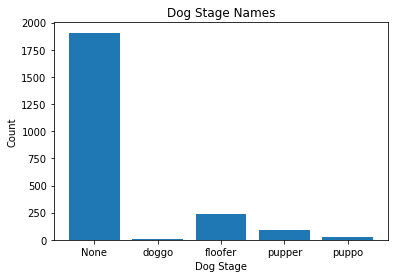

In [94]:
#dog stage 
x = master_df['dog_stage'].unique()
y = master_df['dog_stage'].value_counts(sort=True)

plt.bar(x,y)
plt.title("Dog Stage Names")

plt.xlabel('Dog Stage')
plt.ylabel('Count')

plt.show()

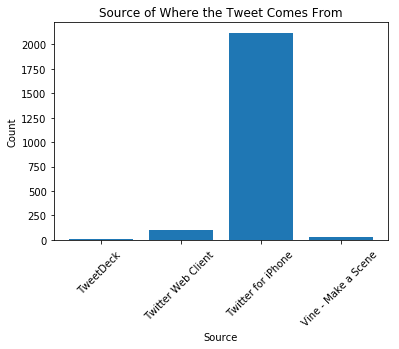

In [93]:
#dog stage 
x = master_df['sourced'].unique()
y = master_df['sourced'].value_counts(sort=True)

plt.bar(x,y)
plt.title("Source of Where the Tweet Comes From")

plt.xlabel('Source')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.show()

### Storing Data

In [85]:
# Saving data to csv

folder = 'WeRateDogs_Project'
if not os.path.exists(folder):
    os.makedirs(folder)
    
    
master_df.to_csv('WeRateDogs_Project/twitter_archive_master.csv')
arc_clean.to_csv('WeRateDogs_Project/clean_twitter_archive_data.csv')
images_clean.to_csv('WeRateDogs_Project/clean_image_prediction_data.csv')
tweets_stats.to_csv('WeRateDogs_Project/tweets_stats.csv')